Basic Pipeline for solving a ML project:

1. Read in Dataset

2. Get to know your dataset using data vizualisation and other techniques

3. Preprocess your dataset:

  * remove/impute null values
  * remove outliers
  * feature scaling
  * feature engineering
  * feature selection

4. train/test split
5. choose and build (number of) machine learning algorithm
5. train model on training data
6. make prediction on test data
7. evaluate performance on test data
8. visualization of your results


In [ ]:
#importing necessary libraries for any ML project
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
import seaborn as sn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv('diabetes.csv')
dataset.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df=dataset

In [ ]:
df.rename(columns = {'Outcome':'Diabetes_result'}, inplace = True) 

In [ ]:
df.shape

(768, 9)

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes_result
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes_result           768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# no of non-zeros in each column
# found diabetes of 268 samples out of 768

df.astype(bool).sum(axis=0) 

Pregnancies                 657
Glucose                     763
BloodPressure               733
SkinThickness               541
Insulin                     394
BMI                         757
DiabetesPedigreeFunction    768
Age                         768
Diabetes_result             268
dtype: int64

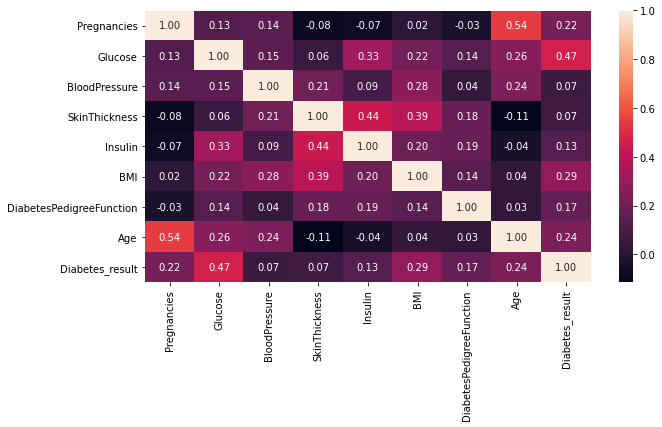

In [ ]:
fig= plt.figure(figsize=(10,5))
sn.heatmap(df.corr(), annot=True,fmt=".2f")
plt.show()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetes_result'],
      dtype='object')

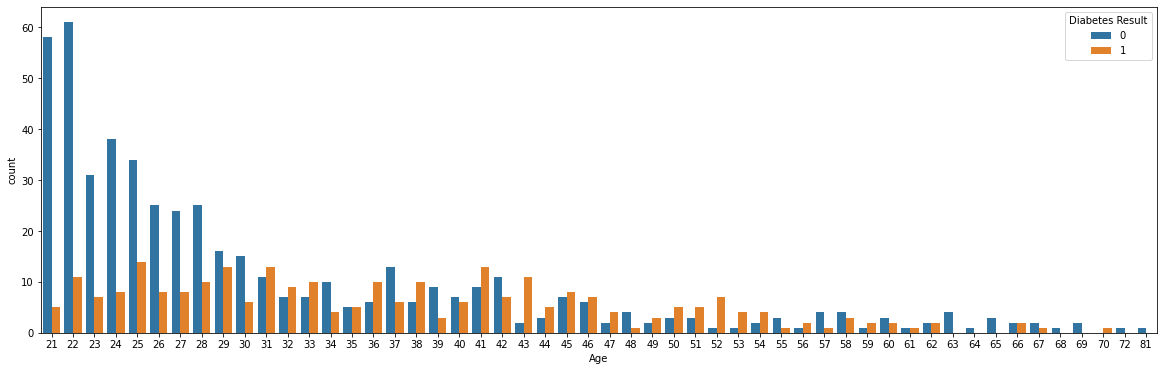

In [ ]:
plt.figure(figsize=(20,6))
plt.legend(['yes', 'no'],loc='upper right')
g = sn.countplot(data = df, x = 'Age', hue = 'Diabetes_result')
g.legend(title = 'Diabetes Result', loc='upper right', ncol=1)

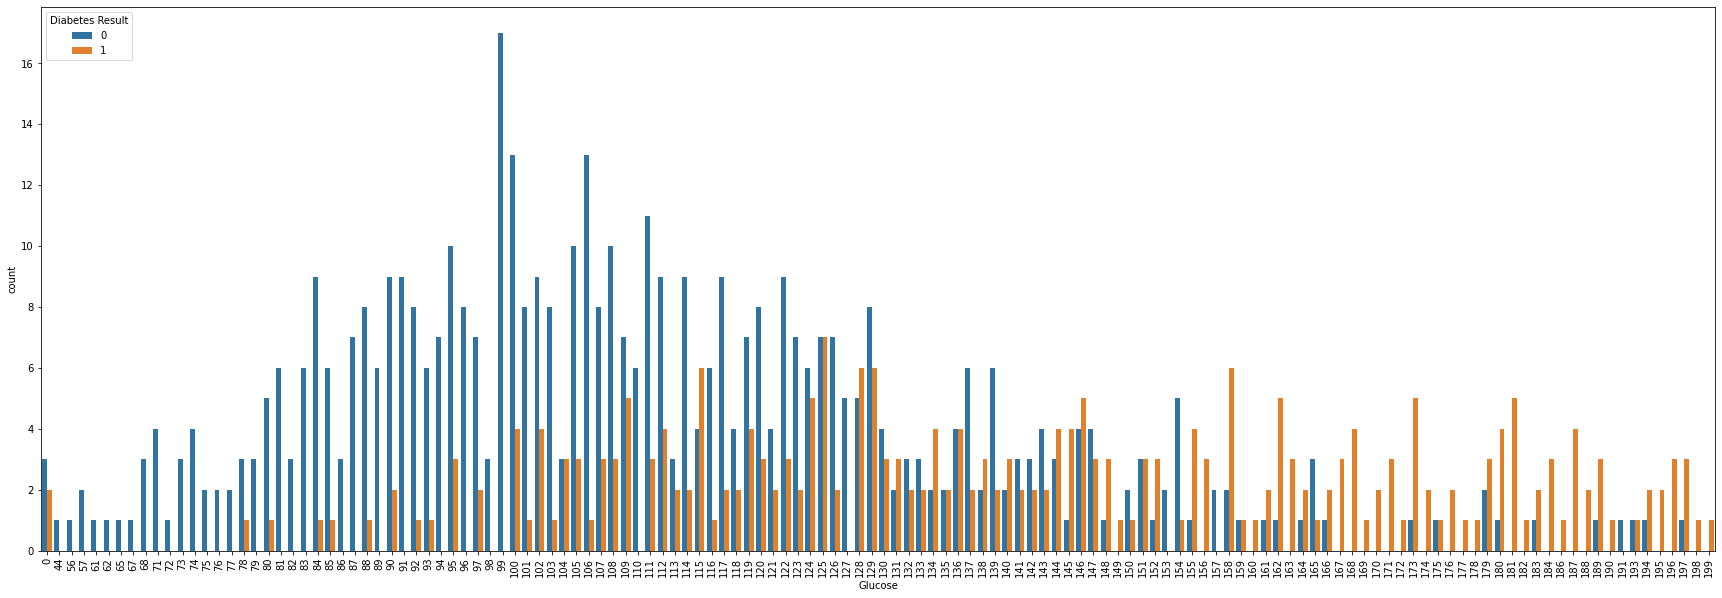

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.legend(['yes', 'no'],loc='upper right')
g = sn.countplot(data = df, x = 'Glucose', hue = 'Diabetes_result')
g.legend(title = 'Diabetes Result',loc='upper left', ncol=1)

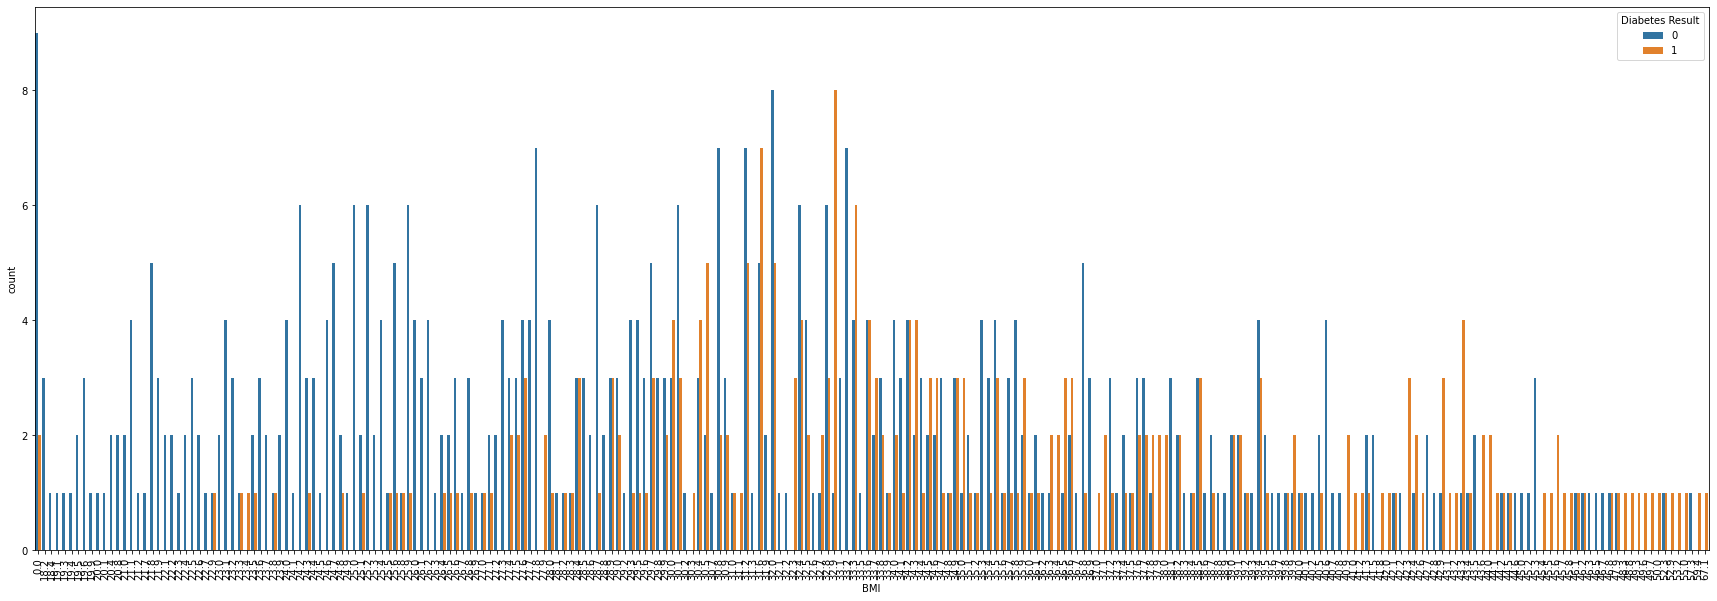

In [ ]:
plt.figure(figsize=(30,10))
plt.xticks(rotation=90)
plt.legend(['yes', 'no'],loc='upper right')
g = sn.countplot(data = df, x = 'BMI', hue = 'Diabetes_result')
g.legend(title = 'Diabetes Result',loc='upper right', ncol=1)

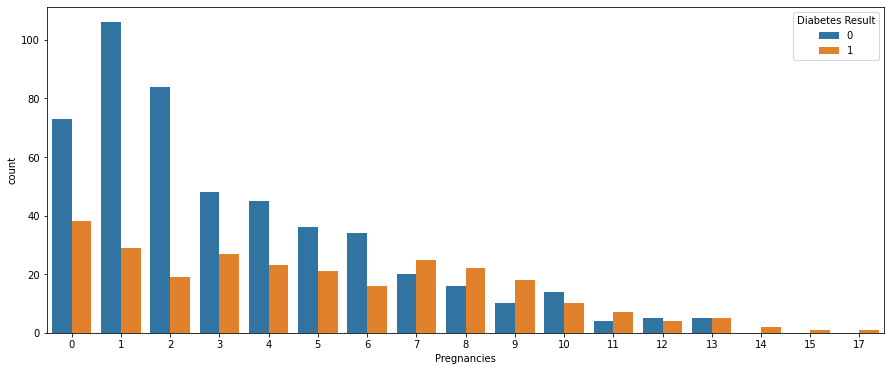

In [ ]:
plt.figure(figsize=(15,6))
# plt.xticks(rotation=90)
plt.legend(['yes', 'no'],loc='upper right')
g = sn.countplot(data = df, x = 'Pregnancies', hue = 'Diabetes_result')
g.legend(title = 'Diabetes Result',loc='upper right', ncol=1)

In [ ]:
#checking the sum of null values in each column
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes_result             0
dtype: int64

In [ ]:
X = df.iloc[:, 0:8].values
y = df.iloc[:,8].values

In [ ]:
print(X)
print(y)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0

In [ ]:
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Diabetes_result               0.476951
dtype: float64

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#member 1 ends #Swadhin Roy
#member 2 starts from next cell

In [ ]:
# Without feature Scaling
knn=KNeighborsClassifier()

knn.fit(X_train, y_train)

print("Test set accuracy: {:.2f}".format(knn.score(X_test, y_test)))

Test set accuracy: 0.76


In [ ]:
# Feature Scaling with Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

 N= 1, Accuracy 72.40%
 N= 2, Accuracy 74.48%
 N= 3, Accuracy 72.92%
 N= 4, Accuracy 77.60%
 N= 5, Accuracy 80.21%
 N= 6, Accuracy 79.17%
 N= 7, Accuracy 77.08%
 N= 8, Accuracy 78.12%
 N= 9, Accuracy 78.65%
 N= 10, Accuracy 76.56%
 N= 11, Accuracy 76.56%
 N= 12, Accuracy 76.56%
 N= 13, Accuracy 77.08%
 N= 14, Accuracy 77.08%
 N= 15, Accuracy 78.12%
 N= 16, Accuracy 79.17%
 N= 17, Accuracy 78.12%
 N= 18, Accuracy 76.56%
 N= 19, Accuracy 77.60%
 N= 20, Accuracy 76.56%


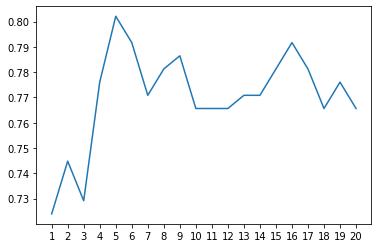

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
accuracy=[]
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred_knn))
    print(" N= {}, Accuracy {:.2f}%".format(i,accuracy_score(y_test, y_pred_knn)*100))
   
plt.plot(range(1,21),accuracy)
plt.xticks(np.arange(1,21,1))
plt.show()

In [ ]:
Accuracy_list= []

In [ ]:
#choosing n=5 for highest peak value
knn = KNeighborsClassifier(n_neighbors =5)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print("KNNClassifier")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_knn)*100))
print(classification_report(y_test, y_pred_knn))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_knn))
Accuracy_list.append(accuracy_score(y_test, y_pred_knn)*100)

KNNClassifier
Test Accuracy: 80.21%
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       130
           1       0.71      0.65      0.68        62

    accuracy                           0.80       192
   macro avg       0.78      0.76      0.77       192
weighted avg       0.80      0.80      0.80       192

Confusion Matrix
[[114  16]
 [ 22  40]]


In [ ]:
# preprocessing using 0-1 scaling
#Feature Scaling with MinMax Scaler
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

#train
knn.fit(X_train_scaled, y_train)

# scoring on the scaled test set
print("Scaled test set accuracy: {:.2f}%".format(knn.score(X_test_scaled, y_test)*100))

Scaled test set accuracy: 75.52%


# **So standard scaler perfomed better and we are choosing it for the next classifiers**



#Implementing necessary ML algorithms







In [ ]:
from sklearn.ensemble  import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)  
RF.fit(X_train, y_train)
y_pred_RF = RF.predict(X_test)
print("RandomForestClassifier")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_RF)*100))
print(classification_report(y_test, y_pred_RF))
print("Confusion Matrix")
print( confusion_matrix(y_test, y_pred_RF))
Accuracy_list.append(accuracy_score(y_test, y_pred_RF)*100)

#member 2 ends #member 2 Tanvir
#member 3 starts from next cell

RandomForestClassifier
Test Accuracy: 77.08%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.69      0.53      0.60        62

    accuracy                           0.77       192
   macro avg       0.74      0.71      0.72       192
weighted avg       0.76      0.77      0.76       192

Confusion Matrix
[[115  15]
 [ 29  33]]


In [ ]:
from sklearn.naive_bayes import GaussianNB
nbclassifier=GaussianNB()
nbclassifier.fit(X_train, y_train)
nb_y_pred = nbclassifier.predict(X_test)
print("GaussianNB")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, nb_y_pred)*100))
print(classification_report(y_test, nb_y_pred))
print("Confusion Matrix")
print( confusion_matrix(y_test, nb_y_pred))
Accuracy_list.append(accuracy_score(y_test, nb_y_pred)*100)

GaussianNB
Test Accuracy: 76.56%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       130
           1       0.67      0.53      0.59        62

    accuracy                           0.77       192
   macro avg       0.74      0.70      0.71       192
weighted avg       0.76      0.77      0.76       192

Confusion Matrix
[[114  16]
 [ 29  33]]


In [ ]:
svmkclassifier =SVC(kernel ='rbf',random_state=0,gamma='auto')
svmkclassifier.fit(X_train, y_train)
y_pred_SVMK = svmkclassifier.predict(X_test)
print("svmkclassifier")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_SVMK)*100))
print(classification_report(y_test, y_pred_SVMK))
print("Confusion Matrix")
print( confusion_matrix(y_test, y_pred_SVMK))
Accuracy_list.append(accuracy_score(y_test, y_pred_SVMK)*100)

#member 3 ends #member 3 arja
#member 4 starts from next cell

svmkclassifier
Test Accuracy: 77.60%
              precision    recall  f1-score   support

           0       0.80      0.90      0.84       130
           1       0.71      0.52      0.60        62

    accuracy                           0.78       192
   macro avg       0.75      0.71      0.72       192
weighted avg       0.77      0.78      0.77       192

Confusion Matrix
[[117  13]
 [ 30  32]]


In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression(random_state = 42,max_iter= 150)
lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)
print("LRclassifier")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_lr)*100))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix")
print( confusion_matrix(y_test, y_pred_lr))
Accuracy_list.append(accuracy_score(y_test, y_pred_lr)*100)

LRclassifier
Test Accuracy: 80.21%
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192

Confusion Matrix
[[118  12]
 [ 26  36]]


In [ ]:
sgdclassifier=SGDClassifier()
sgdclassifier.fit(X_train, y_train)
sgd_y_pred = sgdclassifier.predict(X_test)
print("SGDClassifier")
print("Test Accuracy: {:.2f}%".format(accuracy_score(y_test, sgd_y_pred)*100))
print(classification_report(y_test, sgd_y_pred))
print("Confusion Matrix")
print( confusion_matrix(y_test, sgd_y_pred))
Accuracy_list.append(accuracy_score(y_test, sgd_y_pred)*100)

#member 4 ends #member 4 rohan
#member 5 starts from next cell and finishes the explanation #member 5 Rana

SGDClassifier
Test Accuracy: 74.48%
              precision    recall  f1-score   support

           0       0.80      0.83      0.82       130
           1       0.61      0.56      0.59        62

    accuracy                           0.74       192
   macro avg       0.71      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192

Confusion Matrix
[[108  22]
 [ 27  35]]


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtclassifier= DecisionTreeClassifier(criterion='entropy')
dtclassifier.fit(X_train,y_train)
# Make predictions using the testing set
y_pred_DT = dtclassifier.predict(X_test)
print("DecisionTreeClassifier")
print(" Test Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_DT)*100))
print(classification_report(y_test, y_pred_DT))
print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred_DT))
Accuracy_list.append(accuracy_score(y_test, y_pred_DT)*100) #for adding the accuracy score in the accuracy_list

DecisionTreeClassifier
 Test Accuracy: 76.56%
              precision    recall  f1-score   support

           0       0.86      0.78      0.82       130
           1       0.62      0.73      0.67        62

    accuracy                           0.77       192
   macro avg       0.74      0.76      0.74       192
weighted avg       0.78      0.77      0.77       192

Confusion Matrix
[[102  28]
 [ 17  45]]


feature: 
 Pregnancies 
Coefficients: 
 [0.02681111] 
Interceptor: 
 0.25467676397574346
Mean squared error: 0.20
Coefficient of determination: 0.08


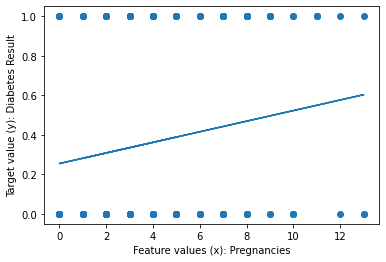

feature: 
 Glucose 
Coefficients: 
 [0.0069198] 
Interceptor: 
 -0.48073790101848696
Mean squared error: 0.17
Coefficient of determination: 0.24


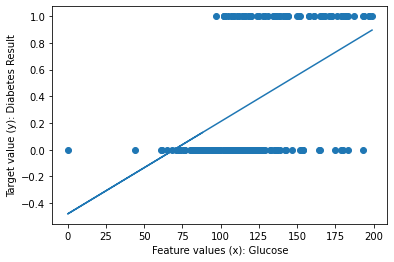

feature: 
 BloodPressure 
Coefficients: 
 [0.00212711] 
Interceptor: 
 0.20941356645373096
Mean squared error: 0.22
Coefficient of determination: -0.01


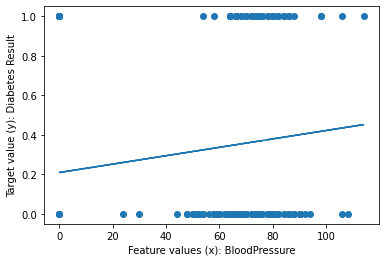

feature: 
 SkinThickness 
Coefficients: 
 [0.00337715] 
Interceptor: 
 0.2862906819248897
Mean squared error: 0.22
Coefficient of determination: -0.03


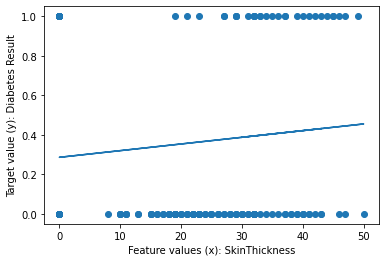

feature: 
 Insulin 
Coefficients: 
 [0.0005769] 
Interceptor: 
 0.3090727723230913
Mean squared error: 0.22
Coefficient of determination: 0.00


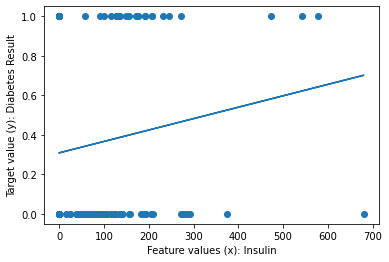

feature: 
 BMI 
Coefficients: 
 [0.01849989] 
Interceptor: 
 -0.23822128191356157
Mean squared error: 0.21
Coefficient of determination: 0.05


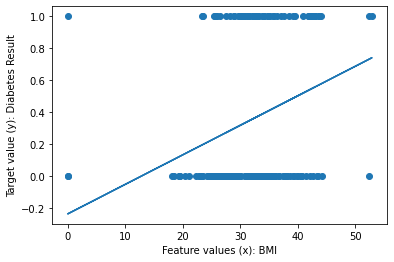

feature: 
 DiabetesPedigreeFunction 
Coefficients: 
 [0.24285256] 
Interceptor: 
 0.24385192443948045
Mean squared error: 0.21
Coefficient of determination: 0.03


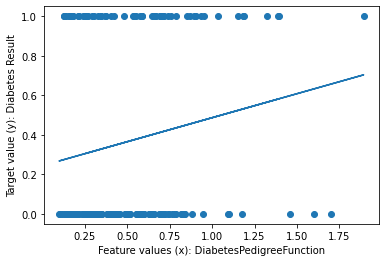

feature: 
 Age 
Coefficients: 
 [0.00977517] 
Interceptor: 
 0.029356258734412055
Mean squared error: 0.21
Coefficient of determination: 0.04


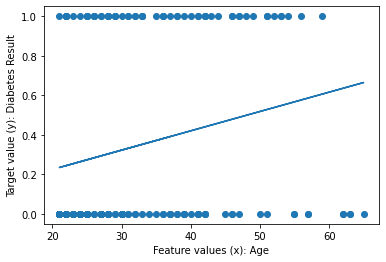

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
regr = LinearRegression()
feature=df.columns

# only one feature for each loop

for i in range(8):
    
    X1 = df.iloc[:, i:i+1].values

    X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size = 0.25, random_state = 0)

    regr.fit(X_train1, y_train1)

    # Make predictions using the testing set
    y_pred_linr= regr.predict(X_test1)

    # The coefficients
    reg_coef=regr.coef_
    interc=regr.intercept_
    print("feature: \n",feature[i],'\nCoefficients: \n', reg_coef,'\nInterceptor: \n',interc)
    # The mean squared error # the average squared difference between the estimated values and the actual value
    print('Mean squared error: %.2f'
          %mean_squared_error(y_test1,y_pred_linr))
    # The coefficient of determination: 1 is perfect prediction formula: 1-u/v
    print('Coefficient of determination: %.2f'
          % r2_score(y_test1, y_pred_linr))

    # Plot outputs
    #plt.figure(figsize=(20,6))
    plt.scatter(X_test1,y_test1)
    plt.plot(X_test1, y_pred_linr,"-")
    plt.xlabel(f'Feature values (x): {feature[i]}')
    plt.ylabel('Target value (y): Diabetes Result')
    plt.show()

##So KNN and LR performed better that other  algorithms, AUC=80.21%

 



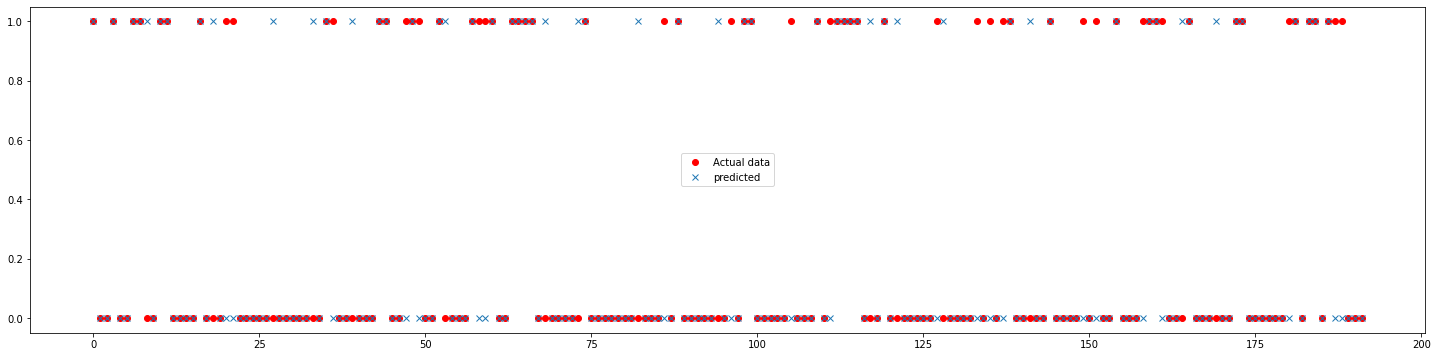

In [ ]:
#plotting the prediction and actual target value for KNN
plt.figure(figsize=(25,6))
plt.plot(y_test,"o",color="RED")
plt.plot(y_pred_knn,"x")
plt.legend(['Actual data', 'predicted'],loc='center')

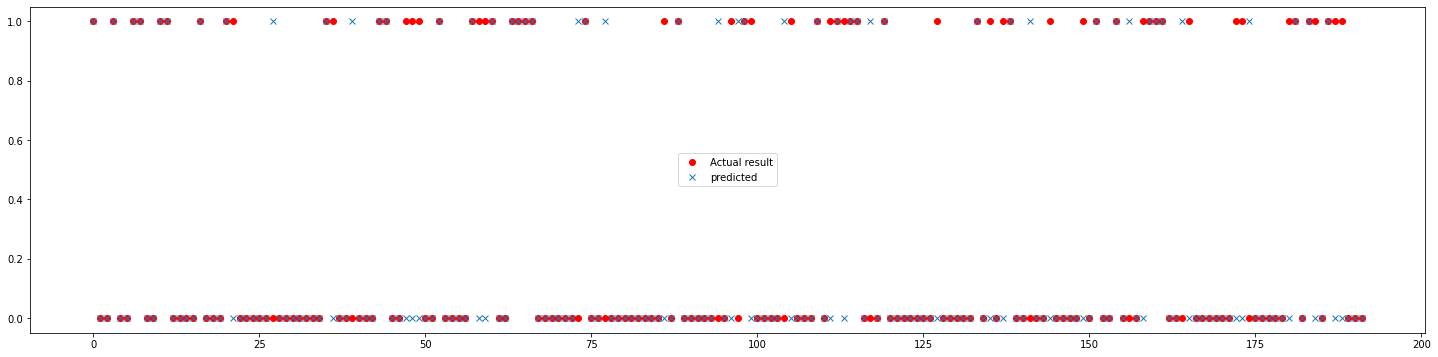

In [ ]:
#plotting the prediction and actual target value for LR
plt.figure(figsize=(25,6))
plt.plot(y_test,"o",color="RED")
plt.plot(y_pred_lr,"x")
plt.legend(['Actual result', 'predicted'],loc='center')

[80.20833333333334, 77.08333333333334, 76.5625, 77.60416666666666, 80.20833333333334, 74.47916666666666, 76.5625]


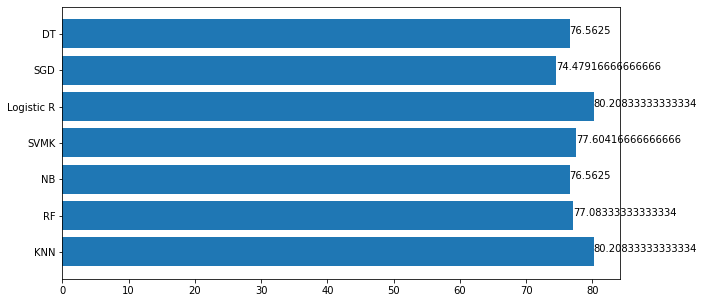

In [ ]:
names = ['KNN',"RF", 'NB', 'SVMK', 'Logistic R', 'SGD',"DT"]
print(Accuracy_list)
plt.figure(figsize=(10, 5))
plt.barh(names, Accuracy_list)

for index, value in enumerate(Accuracy_list):
   plt.text(value, index, str(value))

This is just a visualization of the prediction accuracy. For diabetes or any medical disease prediction confusion matrix is very important. By accuracy and confusion matrix evaluation(FP,FN,TP,TN) we can get the best model to predict the diabetes patient.